# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
# View the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


In [16]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Food_Hub/foodhub_order.csv')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [17]:
# Rows and Coloumns
df.shape

(1898, 9)

#### Observations: 1898, 9


In [18]:
# Data types
df.dtypes

,0
order_id,int64
customer_id,int64
restaurant_name,object
cuisine_type,object
cost_of_the_order,float64
day_of_the_week,object
rating,object
food_preparation_time,int64
delivery_time,int64


#### Observations:
Int64, Object, Float64,


In [ ]:
# Check missing values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0




#### Observations: 0 missing values


In [ ]:
# Statistical summary
column_stats = df['food_preparation_time'].describe()
print(column_stats)

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


#### Observations:
      Minimum - 20 minutes to prep
      Average - 27 minutes to prep
      Max - 35 minutes to prep
      


In [ ]:
# Orders not rated
column_stats = df['rating'].describe()
print(column_stats)
not_rated_count = df['rating'].isna().sum()
print(f'The number of orders that are not rated: {not_rated_count}')

count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object
The number of orders that are not rated: 0


#### Observations:
The number of orders that are not rated = 736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

<Figure size 1800x1200 with 0 Axes>

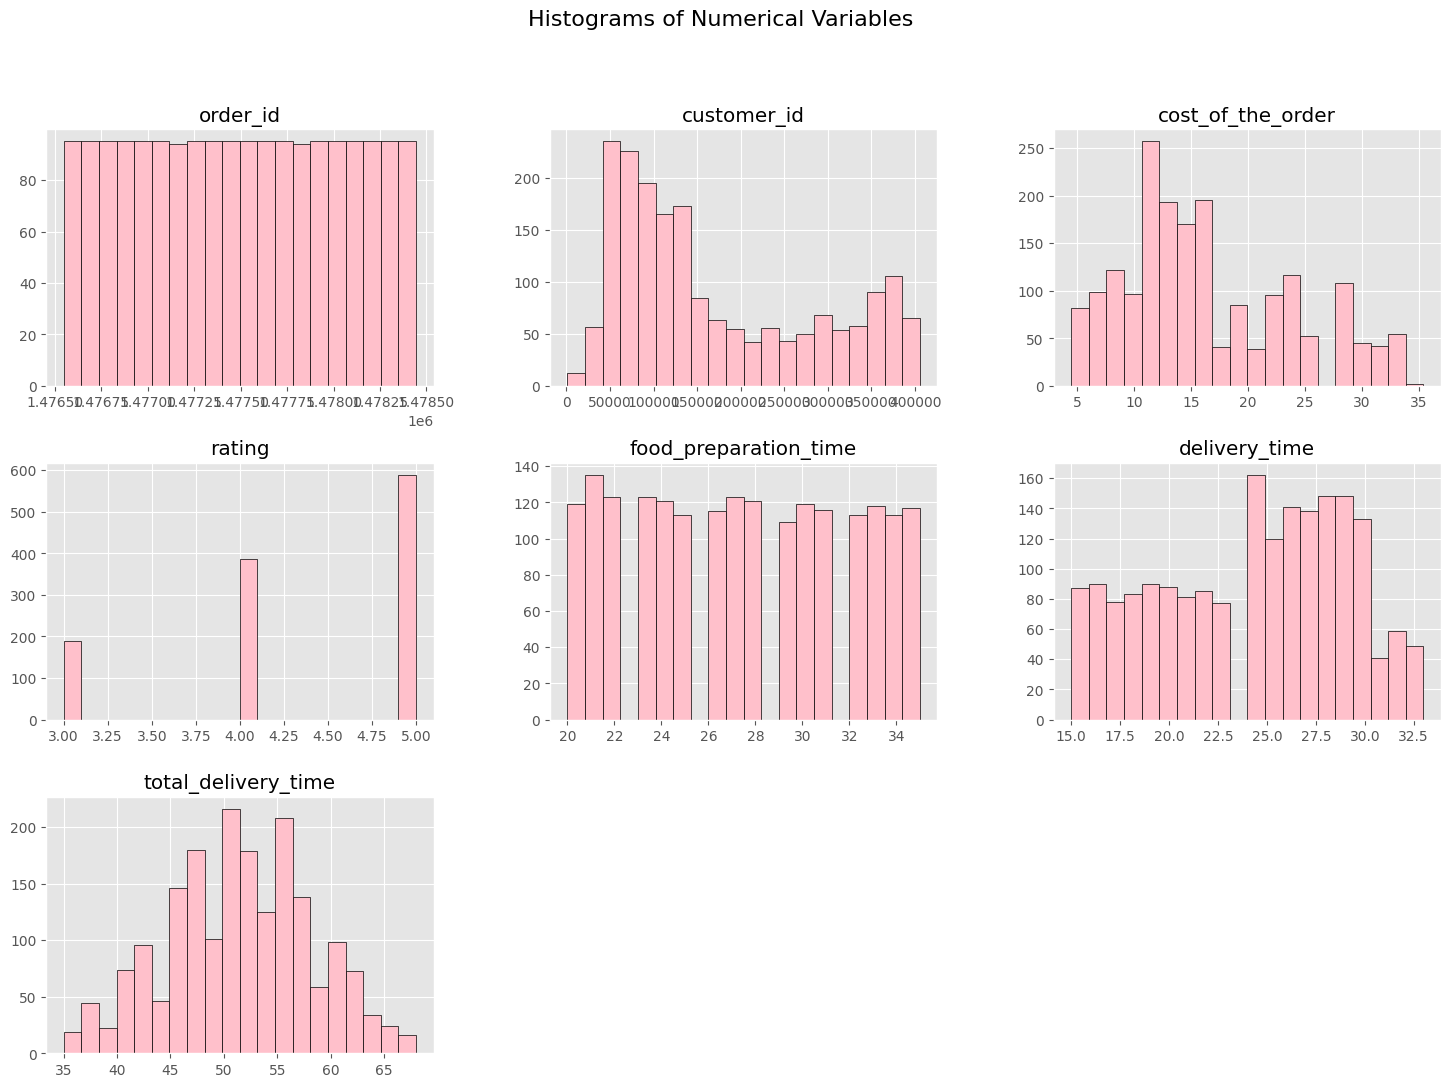

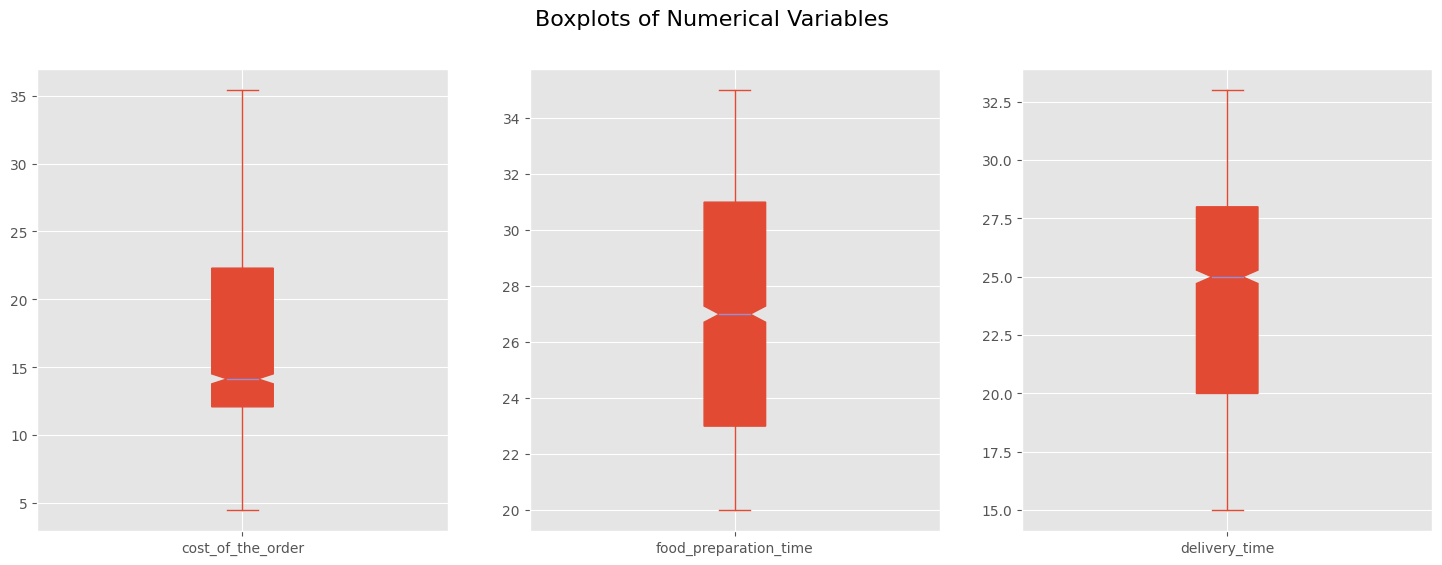

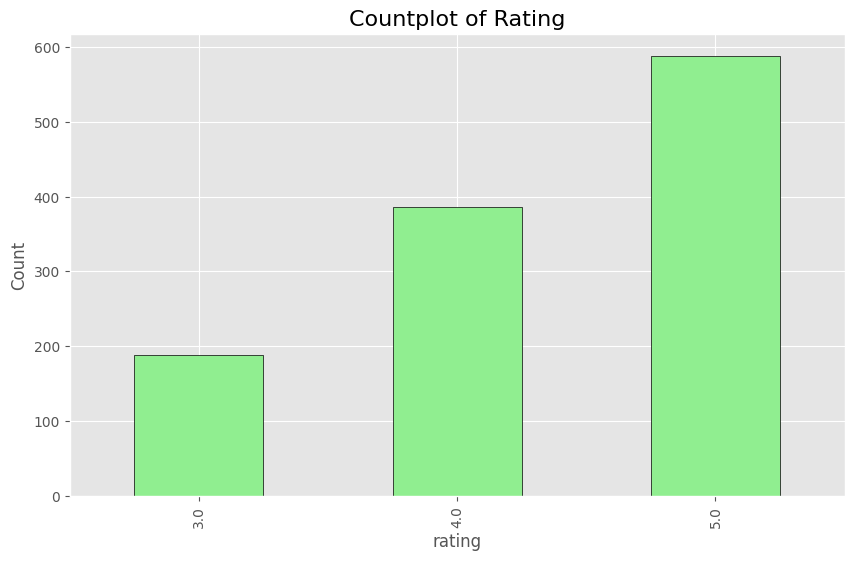

In [39]:
import matplotlib.pyplot as plt

# Set up the plotting environment
plt.style.use('ggplot')
plt.figure(figsize=(18, 12))

# Plotting histograms for numerical variables
df.hist(figsize=(18, 12), bins=20, color='pink', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.show()
# Plotting boxplots for numerical variables
df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(18, 6), patch_artist=True, notch=True)
plt.suptitle('Boxplots of Numerical Variables', fontsize=16)
plt.show()




# Plotting countplot for rating (ordinal variable)
plt.figure(figsize=(10, 6))
df['rating'].value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Countplot of Rating', fontsize=16)
plt.ylabel('Count')
plt.show()


Observation
### Histogram shows very few high-cost orders.
### Common prep times
### Delivery time is right-skewed demonstrating a majority of deliveries happening in shorter time frames
### food prep shows uniform distribution

In [ ]:
# Top 5 restaurants by number of orders recieved
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_5_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


In [42]:
# Popular cuisine on weekends
unique_days = df['day_of_the_week'].unique()

# Filter the data for weekends (using the identified 'Weekend' label)
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# Find the most popular cuisine type on weekends
most_popular_cuisine = weekend_data['cuisine_type'].value_counts().idxmax()

# Output the most popular cuisine
print("The most popular cuisine on weekends is:", most_popular_cuisine)

The most popular cuisine on weekends is: American


In [ ]:
# % of orders > $20
orders_above_20 = df[df['cost_of_the_order'] > 20]
total_orders = len(df)
orders_above_20_percentage = (len(orders_above_20) / total_orders) * 100
print(f"The percentage of orders costing more than $20 is: {orders_above_20_percentage:.2f}%")

The percentage of orders costing more than $20 is: 29.24%


In [21]:
# Mean order delivery time
mean_delivery_time = df['delivery_time'].mean()
print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")

The mean order delivery time is: 24.16 minutes


In [ ]:
# top 3 most frequent customers # of orders they placed
customer_order_counts = df['customer_id'].value_counts()
top_3_customers = customer_order_counts.head(3)
print("Top 3 most frequent customers:")
print(top_3_customers)

Top 3 most frequent customers:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


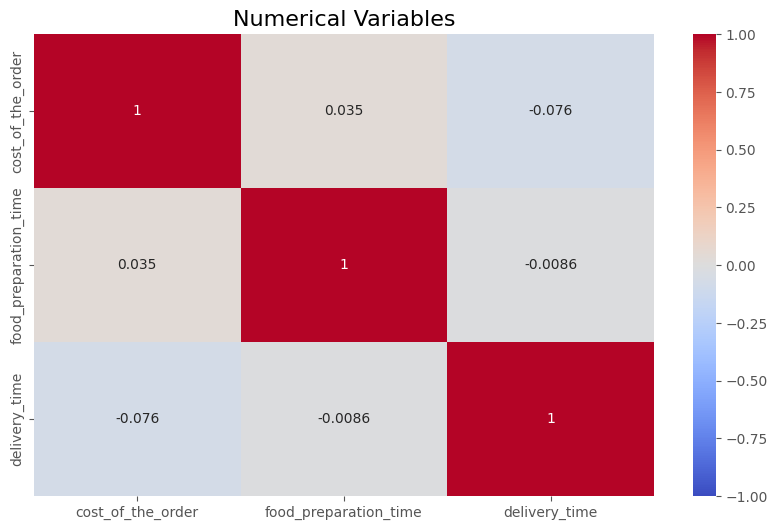

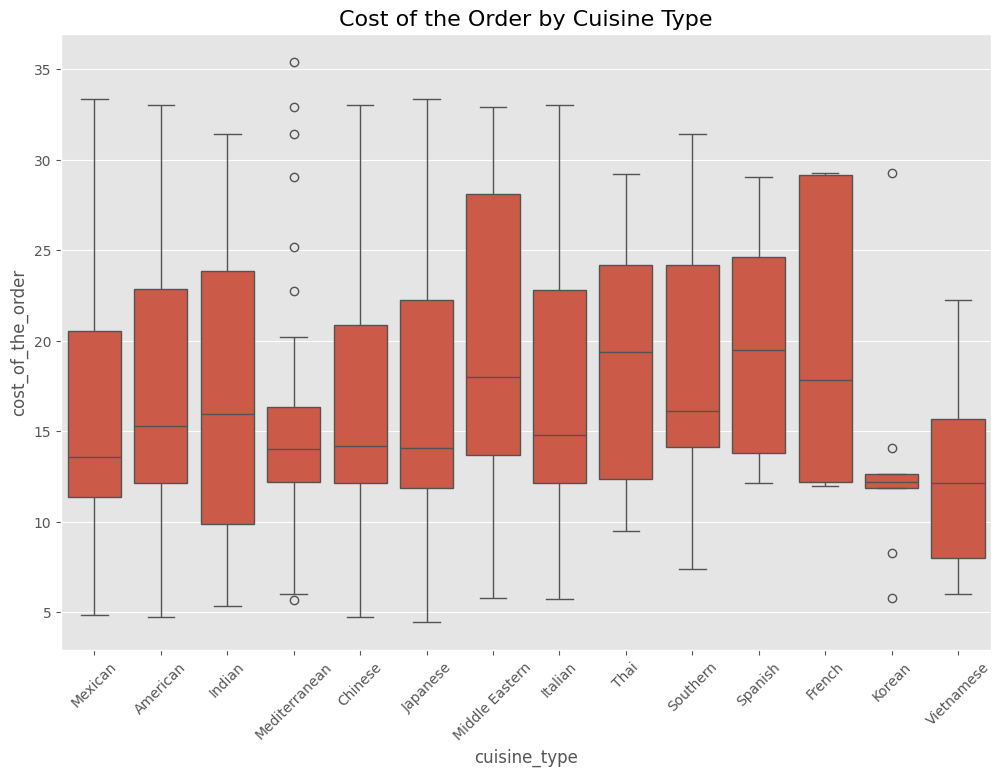

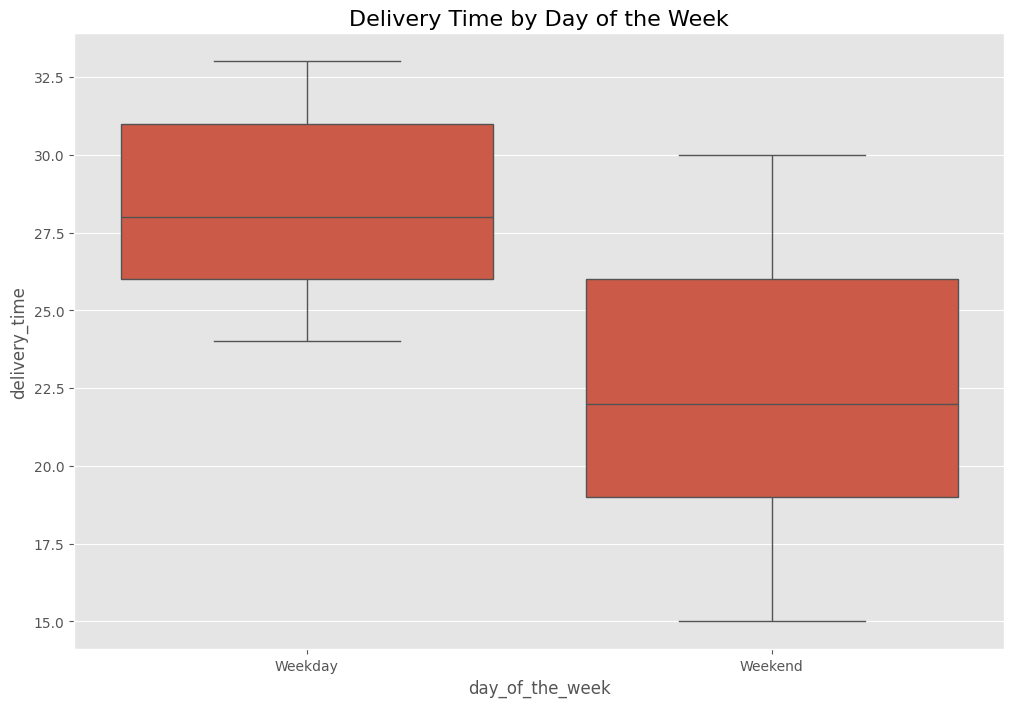

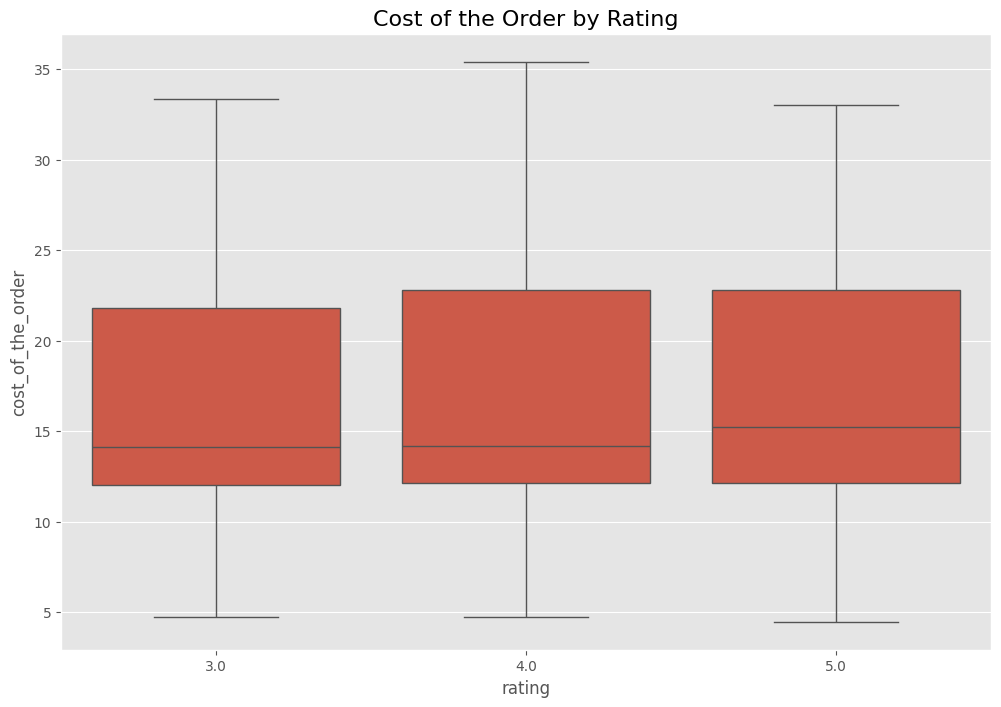

In [47]:
# Multivariate Analysis
import seaborn as sns
# Convert numeric ratings to integers and handle "Not given" entries
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with NaN values in numeric columns
df_cleaned = df.dropna(subset=['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating'])

# Heatmap to explore correlations between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Numerical Variables', fontsize=16)
plt.show()

# Boxplot to explore the relationship between cost of the order and cuisine type
plt.figure(figsize=(12, 8))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df_cleaned, )
plt.xticks(rotation=45)
plt.title('Cost of the Order by Cuisine Type', fontsize=16)
plt.show()

# Boxplot to explore the relationship between delivery time and day of the week
plt.figure(figsize=(12, 8))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df_cleaned, )
plt.title('Delivery Time by Day of the Week', fontsize=16)
plt.show()

# Boxplot to explore the relationship between rating and cost of the order
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='cost_of_the_order', data=df_cleaned, )
plt.title('Cost of the Order by Rating', fontsize=16)
plt.show()

In [48]:
# Rating > 50. w / average rating > 4
restaurant_ratings = df_cleaned.groupby('restaurant_name')['rating'].agg(['count', 'mean'])
# Apply the conditions: rating count > 50 and average rating > 4
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]
eligible_restaurants.reset_index(inplace=True)
eligible_restaurants

,restaurant_name,count,mean
0,Blue Ribbon Fried Chicken,64,4.328125
1,Blue Ribbon Sushi,73,4.219178
2,Shake Shack,133,4.278195
3,The Meatball Shop,84,4.511905


In [32]:
import pandas as pd
# df = pd.read_csv('your_dataset.csv')

# Convert the rating column to numeric (assuming it's in a string format)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group the data by restaurant to calculate the rating count and average rating
restaurant_ratings = df.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')

# Filter the restaurants based on the given criteria
eligible_restaurants = restaurant_ratings[
    (restaurant_ratings['rating_count'] > 50) &
    (restaurant_ratings['average_rating'] > 4)
]

# Display the eligible restaurants
eligible_restaurants = eligible_restaurants.reset_index()
eligible_restaurants


,restaurant_name,rating_count,average_rating
0,Blue Ribbon Fried Chicken,64,4.328125
1,Blue Ribbon Sushi,73,4.219178
2,Shake Shack,133,4.278195
3,The Meatball Shop,84,4.511905


In [31]:
# Calculate revenue from orders costing more than $20 (25% commission)
revenue_above_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'] * 0.25

# Calculate revenue from orders costing more than $5 but less than or equal to $20 (15% commission)
revenue_between_5_and_20 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'] * 0.15

# Calculate total revenue
total_revenue = revenue_above_20.sum() + revenue_between_5_and_20.sum()

total_revenue


6166.303

In [29]:
# Total delivery time % that takes longer than 60 minutes
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
total_orders = len(df)
orders_above_60_minutes = len(df[df['total_delivery_time'] > 60])
percentage_above_60_minutes = (orders_above_60_minutes / total_orders) * 100

percentage_above_60_minutes

10.537407797681771

In [27]:
# Delivery time weekdays vs weekends
import pandas as pd

# Load your dataset into a DataFrame
df = pd.read_csv('/content/drive/My Drive/Food_Hub/foodhub_order.csv')

# Define the weekend days
weekend_days = ['Saturday', 'Sunday']

# Separate the data into weekdays and weekends
weekend_df = df[df['day_of_the_week'].isin(weekend_days)]
weekday_df = df[~df['day_of_the_week'].isin(weekday_days)]

# Calculate the mean delivery time for weekends
mean_delivery_time_weekend = weekend_df['delivery_time'].mean()

# Calculate the mean delivery time for weekdays
mean_delivery_time_weekday = weekday_df['delivery_time'].mean()

# Display the results
print(f"Mean delivery time on weekends: {mean_delivery_time_weekend:.2f} minutes")
print(f"Mean delivery time on weekdays: {mean_delivery_time_weekday:.2f} minutes")

print(day_of_the_week)

Mean delivery time on weekends: nan minutes
Mean delivery time on weekdays: 24.16 minutes
Empty DataFrame
Columns: [order_id, customer_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time, delivery_time]
Index: []


### Conclusion and Recommendations

### Conclusions:
* **Popular Cuisines:**

**American cuisine** is the most popular, especially on weekends. This indicates a strong customer preference for this type of cuisine.
Other cuisines also have their own customer bases, but none are as dominant as American cuisine.

* **Ratings and Order Costs:**

Orders with higher costs tend to receive slightly better ratings. This suggests that customers might associate higher spending with better quality or service, leading to higher satisfaction.
However, the distribution shows that even lower-cost orders can achieve high ratings, indicating that value for money is crucial in customer satisfaction.

* **Restaurant Performance:**

Restaurants like **Shake Shack, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and The Meatball Shop** not only have a high volume of ratings but also maintain an average rating above 4. These establishments are prime candidates for promotional offers, as they consistently meet high customer expectations.

* **Delivery Times:**

Delivery times are slightly longer and more varied on weekends, which could impact customer satisfaction. **Efficient delivery is crucial, especially during peak times.**

### Recommendations:

* **Focus on Popular Cuisines:**

**Expand or promote American cuisine offerings:** Given the popularity of American cuisine, increasing the variety or availability of American dishes could drive more sales, especially on weekends.
Leverage the popularity of top-rated restaurants: Use these establishments in marketing campaigns to highlight quality dining experiences. This could also include bundling meals from these restaurants with other promotions.

* **Enhance Customer Satisfaction:**

**Value for Money:** Since customers appreciate both high-quality and affordable meals, it's important to balance menu offerings across various price points while maintaining quality.
Improvement in Service: Restaurants should focus on maintaining high service quality, particularly during peak times, to ensure consistent ratings. Encouraging feedback and promptly addressing concerns can help improve customer perceptions.

* **Optimize Delivery Operations:**

Improve weekend delivery efficiency: Given that delivery times tend to be longer on weekends, investing in logistical improvements or offering incentives for quicker deliveries could enhance customer satisfaction.
Predictive Ordering and Staffing: Use data to predict high-demand periods and ensure that restaurants are adequately staffed and prepared to handle these times efficiently.

* **Incentivize Consistently High-Performing Restaurants:**

**Provide promotional offers** to restaurants that consistently receive high ratings and have a significant volume of orders. This will encourage other restaurants to improve their service and product offerings to achieve similar recognition.

* **Targeted Marketing Campaigns:**

**Utilize customer feedback** to target specific demographics with tailored promotions. For example, customers who frequently order American cuisine can receive promotions for new American dishes or discounts at top-rated American restaurants.

**By focusing on these areas, the business can capitalize on its strengths, address its challenges, and ultimately improve customer satisfaction and revenue.**

---